## Question 1: Linear Regression

In [232]:
# Import all the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import normalize
import pandas as pd

In [233]:
# Read the dataset
df = pd.read_csv('auto-mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [234]:
# Data Cleaning and Nomalization using l2 norm
df=df[df.horsepower!='?']
df.horsepower= df.horsepower.astype('int64')
df.drop('car name', axis = 1, inplace=True)
normal_df = normalize(df, norm="l2")

In [235]:
# Train test split (One third for testing i.e 0.33 and remaining for training)
# mpg is the 0th column and remaining are the features column starting from 1st index
X_train, X_test, Y_train, Y_test = train_test_split(normal_df[:, 1:], normal_df[:, 0], test_size=0.33, random_state=42)
print(Y_train)
print(X_train)

[0.01020671 0.01133969 0.00661152 0.01930656 0.00449237 0.0130384
 0.01084878 0.01570587 0.00545695 0.00415221 0.00319143 0.00522085
 0.00921612 0.00828163 0.00820349 0.00984659 0.00885227 0.00319363
 0.00611211 0.00993722 0.00418026 0.01604148 0.00243621 0.00915631
 0.01717947 0.00923501 0.0192934  0.0037514  0.01560174 0.0212001
 0.00241203 0.01648975 0.00961908 0.0056155  0.00329238 0.0029248
 0.00298439 0.00574747 0.01594131 0.00851305 0.00486331 0.00495539
 0.00268264 0.01159984 0.00331173 0.01314708 0.00710471 0.00287683
 0.01089487 0.01145543 0.00563301 0.0104277  0.00913227 0.00652241
 0.01154705 0.00370468 0.00324459 0.01254557 0.00502162 0.00977502
 0.01129742 0.01416109 0.00586947 0.01150437 0.01833246 0.01378488
 0.00348164 0.00835883 0.01738738 0.00312089 0.00385757 0.02221437
 0.00413801 0.00440966 0.00846646 0.01833288 0.00981858 0.00715772
 0.01109139 0.00658199 0.00991156 0.01510771 0.00616692 0.00868552
 0.00407918 0.01898926 0.00313093 0.00341236 0.00506004 0.0054642

In [236]:
print(normal_df[:, 1:])

[[0.00227234 0.08720114 0.03692556 ... 0.00340851 0.019883   0.00028404]
 [0.00215405 0.09423973 0.0444273  ... 0.00309645 0.01884795 0.00026926]
 [0.00231567 0.09204783 0.04341879 ... 0.00318404 0.0202621  0.00028946]
 ...
 [0.00173746 0.05863912 0.03648656 ... 0.00503862 0.03561783 0.00043436]
 [0.00152067 0.04562    0.03003317 ... 0.0070711  0.03117367 0.00038017]
 [0.00146772 0.04366461 0.03008822 ... 0.00711843 0.03008822 0.00036693]]


# Ordinary Linear Regression

In [237]:
# modelling using Linear Regression
model =  LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [238]:
Y_pred= model.predict(X_test)

In [239]:
# calculating mean squared error
print("Mean squared error:",mean_squared_error(Y_pred, Y_test))

Mean squared error: 1.874651041529805e-06


In [240]:
#Calculating score
print("Score: ",model.score(X_test,Y_test))

Score:  0.9199171531564978


In [241]:
# coeff of all the features
model.coef_

array([ 0.84020765, -0.11601289, -0.1712066 , -1.61009463, -0.27982384,
        0.56987164,  0.84684289])

In [242]:
# year is second last column in the features. 
print("Year Coefficient:", model.coef_[5]) #year 

Year Coefficient: 0.5698716404255914


- The coefficient value for the year is 0.56.
- Here, the coefficient sign is positive which indicates as the predictor variable increases, the response variable also increases
- The coefficient value represents the mean change in the response given a one unit change in the predictor. Here for the year where the coefficient is 0.56, the mean response value is changed at the rate of 0.56 every one unit change in the predictor.

# Lasso

In [243]:
from sklearn.linear_model import LassoCV
lasso_reg = LassoCV(cv=5, random_state=0, alphas=[10, 0.001,0.00000001,0.3]).fit(X_train,Y_train)
Y_pred_lasso = lasso_reg.predict(X_test)
print("Score: ",lasso_reg.score(X_test,Y_test))
print("Mean squared error:",mean_squared_error(Y_pred_lasso, Y_test))

Score:  0.9218451920140968
Mean squared error: 1.829517780226406e-06


In [244]:
# Coefficients
lasso_reg.coef_ 

array([ 0.36516346, -0.083077  , -0.14572326, -1.27578323, -0.1934937 ,
        0.58473246,  0.81942232])

In [245]:
# Alpha value
lasso_reg.alpha_

1e-08

# Ridge

In [246]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(cv=5, alphas=[10, 0.001,0.00000001,0.3]).fit(X_train,Y_train)
Y_pred_ridge = ridge_reg.predict(X_test)
print("Score: ",ridge_reg.score(X_test, Y_test))
print("Mean Squared Error: ",mean_squared_error(Y_pred_ridge, Y_test))

Score:  0.9181987190186239
Mean Squared Error:  1.9148776877261005e-06


In [247]:
# Coefficients
ridge_reg.coef_ 

array([ 0.02053449, -0.01912991, -0.03005851, -0.04396165,  0.10153373,
        0.54081557,  0.03769747])

In [248]:
# Alpha value
ridge_reg.alpha_

0.001

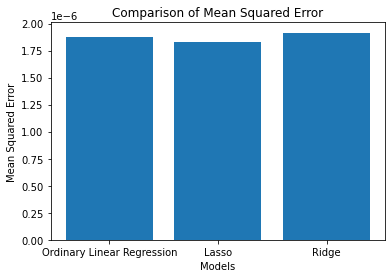

In [249]:
# plotting mean squared error for different models 
mse_list = [1.874651041529805e-06, 1.829517780226406e-06, 1.9148776877261005e-06]
models_list = ['Ordinary Linear Regression', 'Lasso', 'Ridge']

import matplotlib.pyplot as plt
plt.bar(models_list, mse_list)
plt.title('Comparison of Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()